# Week 02 : TA sync session 

## 2.0 Agenda

We will be covering below topics today:
1. Matrix arithmatics 
2. Operations on matrices
3. Various ways to find an inverse of a Matrix
4. Implement Cramer's rule and
5. Eigenvalues & Eigenvectors of a matrix

## 2.1 Matrix arithmatics

In [1]:
# Import numeric python package
import numpy as np

In [2]:
#Let us define a matrix to start with
A = np.array([[1, 2], [3, 4]])
print('The matrix A:\n', A)

The matrix A:
 [[1 2]
 [3 4]]


In [3]:
# Adding Matrix with a scaler
b = 5
print('Addition of 2*A and b:\n',2*A+b)

Addition of 2*A and b:
 [[ 7  9]
 [11 13]]


In [4]:
#Adding Matrix of different sizes (broadcasting principle explained)
#Ref: https://numpy.org/doc/stable/user/basics.broadcasting.html
C = np.array([[2],[3]])
print('Subtraction 3*C from 2*A and :\n',2*A-3*C)

Subtraction 3*C from 2*A and :
 [[-4 -2]
 [-3 -1]]


In [5]:
#Using cell broadcasting in multiplication
print('Multiply A & C:\n',A*C)

Multiply A & C:
 [[ 2  4]
 [ 9 12]]


In [6]:
# Where the cell broadcasting will not work
D = np.array([[1,2,3],[4,5,6],[7,8,9]])
#print('Addition of A and D:\n',A+D)

In [7]:
# Broadcast will work here
E =np.array([10,11,12])
print('Divide 5*D to 3*E:\n',(3*E)/(5*D))

Divide 5*D to 3*E:
 [[6.         3.3        2.4       ]
 [1.5        1.32       1.2       ]
 [0.85714286 0.825      0.8       ]]


## 2.2 Matrix Operations

### 2.2.1 Matrix multiplication

Rules for matrix multiplication:

- When A has size of mxn, B has size of nxo => A multiplied by B will have size mxo 
- No of columns of a multiplier is the same as no of rows of a multiplicant
- A@B is generally not same as B@A

In [8]:
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2],[3,4],[5,6]])
print('Matrix A:\n',A)
print('\n\nMatrix B:\n',B)
print('\n\nMultiplication of A@B:\n',A@B)
print('\n\nMultiplication of B@A:\n',B@A)


Matrix A:
 [[1 2 3]
 [4 5 6]]


Matrix B:
 [[1 2]
 [3 4]
 [5 6]]


Multiplication of A@B:
 [[22 28]
 [49 64]]


Multiplication of B@A:
 [[ 9 12 15]
 [19 26 33]
 [29 40 51]]


In [9]:
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2],[3,4]])
print('Matrix A:\n',A)
print('\n\nMatrix B:\n',B)
#print('Multiplication of A@B:\n',A@B)
print('\n\nMultiplication of B@A:\n',B@A)

Matrix A:
 [[1 2 3]
 [4 5 6]]


Matrix B:
 [[1 2]
 [3 4]]


Multiplication of B@A:
 [[ 9 12 15]
 [19 26 33]]


In [10]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
B = np.array([[7,8,9],[4,5,6],[1,2,3]])
print('Matrix A:\n',A)
print('\n\nMatrix B:\n',B)
print('Multiplication of A@B:\n',A@B)
print('\n\nMultiplication of B@A:\n',B@A)

Matrix A:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]


Matrix B:
 [[7 8 9]
 [4 5 6]
 [1 2 3]]
Multiplication of A@B:
 [[ 18  24  30]
 [ 54  69  84]
 [ 90 114 138]]


Multiplication of B@A:
 [[102 126 150]
 [ 66  81  96]
 [ 30  36  42]]


### 2.2.2 Matrix Transpose: Interchanging rows & columns:

In [11]:
A = np.array([[1,2,3],[4,5,6]])
print("Matrix A:\n", A)
print("\n\nA transpose:\n",A.T)


Matrix A:
 [[1 2 3]
 [4 5 6]]


A transpose:
 [[1 4]
 [2 5]
 [3 6]]


### 2.2.3 Properties of transpose function:


Let 𝐴 and 𝐵 be matrices where the following operations are defined. Then:
- (𝐴+𝐵)^T=A^T+B^T and (𝐴−𝐵)^T=A^T−B^T
- (𝑘𝐴)^𝑇=𝑘𝐴^𝑇
- (𝐴x𝐵)^𝑇=(𝐵^𝑇)x(𝐴^𝑇)
- (𝐴^(−1) )^𝑇=(𝐴^𝑇 )^(−1)
- (𝐴^𝑇 )^𝑇=𝐴


In [12]:
# Testing property 1: (𝐴+𝐵)^T=A^T+B^T 
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[2,3,4],[5,6,7]])
print('Matrix A:\n',A)
print('\n\nMatrix B:\n',B)
print("\n(𝐴+𝐵):\n",(A+B))
print ("\n\n(𝐴+𝐵)^T:\n",(A+B).T)
print('\nMatrix A.T:\n',A.T)
print('\n\nMatrix B.T:\n',B.T)
print("\n\nA^T+B^T:\n",A.T + B.T)

Matrix A:
 [[1 2 3]
 [4 5 6]]


Matrix B:
 [[2 3 4]
 [5 6 7]]

(𝐴+𝐵):
 [[ 3  5  7]
 [ 9 11 13]]


(𝐴+𝐵)^T:
 [[ 3  9]
 [ 5 11]
 [ 7 13]]

Matrix A.T:
 [[1 4]
 [2 5]
 [3 6]]


Matrix B.T:
 [[2 5]
 [3 6]
 [4 7]]


A^T+B^T:
 [[ 3  9]
 [ 5 11]
 [ 7 13]]


In [13]:
# Testing property 2: (𝑘𝐴)^𝑇=𝑘𝐴^𝑇
k = 3
print('Matrix A:\n',A)
print("\n(kA):\n",(k*A))
print ("\n\n(kA)^T:\n",(k*A).T)
print("\n\nk(A^T):\n",k*(A.T))

Matrix A:
 [[1 2 3]
 [4 5 6]]

(kA):
 [[ 3  6  9]
 [12 15 18]]


(kA)^T:
 [[ 3 12]
 [ 6 15]
 [ 9 18]]


k(A^T):
 [[ 3 12]
 [ 6 15]
 [ 9 18]]


In [14]:
# Testing property 3: (𝐴x𝐵)^𝑇=𝐵^𝑇x𝐴^𝑇
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[2,3],[4,5],[6,7]])
print('Matrix A:\n',A)
print('\n\nMatrix B:\n',B)
print("\n\n(𝐴@𝐵):\n",(A@B))
print ("\n\n(𝐴@𝐵)^T:\n",(A@B).T)
print("\n\n(B^T)@(A^T):\n",(B.T)@(A.T))

Matrix A:
 [[1 2 3]
 [4 5 6]]


Matrix B:
 [[2 3]
 [4 5]
 [6 7]]


(𝐴@𝐵):
 [[28 34]
 [64 79]]


(𝐴@𝐵)^T:
 [[28 64]
 [34 79]]


(B^T)@(A^T):
 [[28 64]
 [34 79]]


In [15]:
# Testing property 4: (𝐴^(−1) )^𝑇=(𝐴^𝑇 )^(−1)
A = np.array([[4, 3, 2], [-2, 2, 3], [3, -5, 2]])
print("(A):\n",(A))
print ("\n\n(𝐴^(−1) )^𝑇:\n",(np.linalg.inv(A)).T)
print("\n\n(𝐴^𝑇 )^(−1):\n",(np.linalg.inv(A.T)))

(A):
 [[ 4  3  2]
 [-2  2  3]
 [ 3 -5  2]]


(𝐴^(−1) )^𝑇:
 [[ 0.15447154  0.10569106  0.03252033]
 [-0.1300813   0.01626016  0.23577236]
 [ 0.04065041 -0.1300813   0.11382114]]


(𝐴^𝑇 )^(−1):
 [[ 0.15447154  0.10569106  0.03252033]
 [-0.1300813   0.01626016  0.23577236]
 [ 0.04065041 -0.1300813   0.11382114]]


In [16]:
P = np.round(np.linalg.inv(A).T,6)
Q = np.round(np.linalg.inv(A.T),6)
P==Q

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [17]:
(P==Q).all()

np.True_

In [18]:
# Testing property 5: (𝐴^𝑇 )^𝑇=𝐴

print("Matrix A:\n", A)
print("\n\nA transpose:\n",A.T)
print("\n\nTranspose of A transpose:\n",A.T.T)

Matrix A:
 [[ 4  3  2]
 [-2  2  3]
 [ 3 -5  2]]


A transpose:
 [[ 4 -2  3]
 [ 3  2 -5]
 [ 2  3  2]]


Transpose of A transpose:
 [[ 4  3  2]
 [-2  2  3]
 [ 3 -5  2]]


In [19]:
(A==A.T.T).all()

np.True_

## 2.3 Matrix inverse 

### 2.3.1 Matrix Inverse - by augmented matrix method

- A- is said to be inverse of a matrix A, when A-@A = I, where I is an identity matrix
- The determinant will be reciprocal in case of the inverse matrix. 

In [20]:
# write rows in reduced row echelon (rref) form
#Ref: https://towardsdatascience.com/find-the-inverse-of-a-matrix-using-python-3aeb05b48308

def invert_matrix(M):
    # store dimension
    n = M.shape[0]

    # A must be square with non-zero determinant
    # assert np.linalg.det(M) != 0

    # identity matrix with same shape as A
    I = np.identity(n=n)

    # form the augmented matrix by concatenating A and I
    M = np.concatenate((M, I), axis=1)

    # move all zeros to buttom of matrix
    M = np.concatenate((M[np.any(M != 0, axis=1)], M[np.all(M == 0, axis=1)]), axis=0)

    # iterate over matrix rows
    for i in range(0, n):

        # initialize row-swap iterator
        j = 1

        # select pivot value
        pivot = M[i][i]

        # find next non-zero leading coefficient
        while pivot == 0 and i + j < n:
            # perform row swap operation
            M[[i, i + j]] = M[[i + j, i]]

            # incrememnt row-swap iterator
            j += 1

            # get new pivot
            pivot = M[i][i]

        # if pivot is zero, remaining rows are all zeros
        if pivot == 0:
            # return inverse matrix
            return M[:, n:]

        # extract row
        row = M[i]

        # get 1 along the diagonal
        M[i] = row / pivot

        # iterate over all rows except pivot to get augmented matrix into reduced row echelon form
        for j in [k for k in range(0, n) if k != i]:
            # subtract current row from remaining rows
            M[j] = M[j] - M[i] * M[j][i]

    # return inverse matrix
    return M[:, n:]
    

#### Explanation of the above function:

- def invert_matrix(M):: Defines a function named invert_matrix that takes one argument M, which is expected to be a NumPy array representing a matrix.
n = M.shape[0]: Stores the number of rows (which should be equal to the number of columns for a square matrix) of the input matrix M in the variable n.
- assert np.linalg.det(M) != 0: This is a commented-out line that would have asserted (raised an error if false) that the determinant of the matrix M is not zero. A non-zero determinant is a requirement for a matrix to be invertible.
- I = np.identity(n=n): Creates an identity matrix I of size n x n. An identity matrix has ones on the main diagonal and zeros elsewhere.
- M = np.concatenate((M, I), axis=1): Horizontally concatenates the original matrix M with the identity matrix I. This forms an augmented matrix [M | I].
- M = np.concatenate((M[np.any(M != 0, axis=1)], M[np.all(M == 0, axis=1)]), axis=0): Rearranges the rows of the augmented matrix M. It moves all rows that contain at least one non-zero element to the top and all rows that are entirely zero to the bottom. This is a preprocessing step for the Gaussian elimination process.
for i in range(0, n):: This loop iterates through each row of the matrix M (from the first row, index 0, to the last row, index n-1). The variable i represents the current row being processed as the pivot row.
j = 1: Initializes a variable j to 1. This variable will be used as an offset for finding a non-zero pivot below the current row.
- pivot = M[i][i]: Selects the element at the current row i and the current column i as the pivot. The goal is to make this pivot value 1 and use it to eliminate other elements in the same column.
- while pivot == 0 and i + j < n:: This while loop continues as long as the current pivot is zero and there are rows below the current row (i + j < n) to potentially swap with.
- M[[i, i + j]] = M[[i + j, i]]: Performs a row swap. It exchanges the current row i with the row i + j. This is done to find a row with a non-zero element in the pivot column.
- j += 1: Increments j to check the next row down for a non-zero pivot.
pivot = M[i][i]: After a potential row swap, the pivot value is updated to the element at the current row i and column i.
- if pivot == 0:: If, after checking all rows below, the pivot is still zero, it means the original matrix is likely singular (non-invertible or has a zero determinant in the context of the original commented-out assertion).
- return M[:, n:]: If the pivot is zero, the function returns the right half of the augmented matrix (from column n onwards). In a correctly invertible matrix scenario, this portion would be the inverse. However, if a zero pivot is encountered, the Gaussian elimination couldn't be completed properly.
- row = M[i]: Extracts the current row i of the matrix M into the variable row.
- M[i] = row / pivot: Divides every element in the current row by the pivot value. This normalizes the pivot element to 1.
- for j in [k for k in range(0, n) if k != i]:: This loop iterates through all rows of the matrix M except the current pivot row i. The variable j represents the row being modified.
- M[j] = M[j] - M[i] * M[j][i]: This is the elimination step. It subtracts a multiple of the current pivot row (M[i]) from the current row j. The multiple used is M[j][i], which is the element in row j and the pivot column i. The goal is to make all elements in the pivot column (except the pivot itself, which is 1) equal to zero. This process transforms the left side of the augmented matrix towards the identity matrix.
- return M[:, n:]: After the outer loop completes (meaning all rows have been processed to get the left side of the augmented matrix into reduced row echelon form), the function returns the right half of the augmented matrix (from column n onwards). At this point, if the original matrix was invertible, this right half will be its inverse.


In [21]:
A = np.array([[1,2],[3,4]])
#A = np.array([[1, 6, 1,2], [0, 1, 1,3], [1, 1, 5,2], [0, 6, 1,3]])
#A = np.array([[5,4,3,2,1],[4,3,2,1,5],[3,2,9,5,4],[2,1,5,4,3],[1,2,3,4,5]])
print('Matrix A:\n',A)
result_1 = invert_matrix(A)
print('\n\nInverse matrix as per the above function:\n',np.round(result_1,3),
      '\n\nInverse matrix as per numpy:\n',np.round(np.linalg.inv(A),3))


Matrix A:
 [[1 2]
 [3 4]]


Inverse matrix as per the above function:
 [[-2.   1. ]
 [ 1.5 -0.5]] 

Inverse matrix as per numpy:
 [[-2.   1. ]
 [ 1.5 -0.5]]


In [22]:
(np.round(result_1,3) == np.round(np.linalg.inv(A),3)).all()

np.True_

In [23]:
#Let us learn to make comparision rather than doing it manually
print('\nComparision:', (np.round(result_1,3)==np.round(np.linalg.inv(A),3)).all())


Comparision: True


In [24]:
#Let us multiply with original matrix to find the result
print("Multiply A with A-:\n", np.round(A@result_1,3))

Multiply A with A-:
 [[1. 0.]
 [0. 1.]]


### 2.3.2 Matrix inverse by augmented matrix method using sympy

In [25]:
import sympy as sym
augmented_matrix = sym.Matrix([[4, 3, 1, 0], [-5, 9, 0, 1]])

print('Original augmented matrix:')
display(augmented_matrix)

reduced_echlon_form = augmented_matrix.rref()[0]

print('\nTransformed augmented matrix in Reduced Echelon Form:')
display(reduced_echlon_form)

Original augmented matrix:


Matrix([
[ 4, 3, 1, 0],
[-5, 9, 0, 1]])


Transformed augmented matrix in Reduced Echelon Form:


Matrix([
[1, 0, 3/17, -1/17],
[0, 1, 5/51,  4/51]])

### 2.3.3 Find matrix inverse by calculating Adjugate & determinant of the matrix

We can also find an inverse of a matrix using the below formulae:

    Ainv = Adjugate(A)/Determinant(A)
    
Let us look at its example through a 2D matrix:

In [26]:
#Now, let us find inverse of 2D matrix through determinant and adjugate
def matrix_2d_inv(A):
    '''
    This is a simple function to return the inverse of a 2 dimensional matrix
    
    '''
    #Separate each element of the matrix
    [[a,b],[c,d]] = A
    
    # Finding determinant for the inverse matrix
    det = (a*d - b*c)
    adjugate = ([[d,-b],[-c,a]])
    
    if det==0:
        print("Error! a*d is equal to b*c. Inverse of this matrix is not possible")
        return None 
    else:
        return adjugate/det
    

#Find inverse ofg a matrix A defined above
A = np.array([[1, 2], [3, 4]])
print(matrix_2d_inv(A))

[[-2.   1. ]
 [ 1.5 -0.5]]


In [27]:
#Validate the inverse matrix function
print(matrix_2d_inv(A)@A)

[[1. 0.]
 [0. 1.]]


In [28]:
# Standard way to find the determinant of a matrix
print(np.round(np.linalg.det(A),3))
print(A)

-2.0
[[1 2]
 [3 4]]


In [29]:
# Let us force the error
print(matrix_2d_inv([[0,0],[0,0]]))

Error! a*d is equal to b*c. Inverse of this matrix is not possible
None


In [30]:
# Standard way to find inverse of a matrix
print(np.linalg.inv(A))

[[-2.   1. ]
 [ 1.5 -0.5]]


In [31]:
# Find the determinant of inverse of a matrix
print(np.round(np.linalg.det(np.linalg.inv(A)),3))

-0.5


In [32]:
# Finally, find inverse of inverse of a matrix for validation
print(np.linalg.inv(np.linalg.inv(A)))

[[1. 2.]
 [3. 4.]]


### 2.3.4 What is matrix minor and co-factors

The minors and cofactors are useful to find the adjugate and inverse of a higher dimension matrix. The adjoint of a matrix is equal to the transpose of the cofactors of the elements of the given matrix.

The minor of an element in a matrix is defined as the determinant obtained by deleting the row and column in which that element lies. For example, in the determinant,

D = [[a11, a12, a13], [a21, a22, a23], [a31, a32, a33]]

Minor of a12, called M12 is:
M12 = [[a21, a23], [a31, a33]].

and cofactor of a12 is:
C12 = (-1)^(1+2)M12

Note: D, M are not matrices, but consider them determinants. 

### 2.3.5 Define function to get minor and co-factor of a matrix

In [33]:
# For solving below linear equation with three variables, let us define matrices 
# 4x + 3y + 2z = 25
# -2x + 2y + 3z = -10
# 3x -5y + 2z = -4

A = np.array([[4, 3, 2], [-2, 2, 3], [3, -5, 2]])
B = np.array([25, -10, -4])


In [34]:
#Define function to find minor matrix and cofactor of a given Matrix at a given position 
def GetMinorMatrixCofactor(arr,i,j):
    '''
    This function finds A Minor matrix and cofactor of a matrix.
    Inputs
      arr: Given array 
      i: Given row number(Starts with zero)
      j: Given column number(starts with zero)
    Outputs
     minor_matrix: mMinor matrix excluding the given row and column
     Cofactor: Cofactor value for a given minor matrix
    '''
    c = arr[:]
    c_r = np.delete(c, (i),axis=0) # deletes i-th row
    minor_matrix = np.delete(c_r, (j),axis=1) #deletes j-th column
    
    Cofactor = ((-1)**(i+j))*(np.linalg.det(minor_matrix))
    return minor_matrix, Cofactor

i,j = 1,2
print("Matrix A:\n", A)
print("\nValues of i,j:",i,j)

#Find Minor matrix and cofactor of a matrix
M12, C12 = GetMinorMatrixCofactor(A,i,j)


print("\n\nMinor matrix of aij:\n",M12)
print("\n\nCofactor of aij:\n",C12)

Matrix A:
 [[ 4  3  2]
 [-2  2  3]
 [ 3 -5  2]]

Values of i,j: 1 2


Minor matrix of aij:
 [[ 4  3]
 [ 3 -5]]


Cofactor of aij:
 28.99999999999999


### 2.3.6 What is Adjoint (Adjugate) of a matrix


The adjoint of a 3 x 3 matrix can be obtained by following two simple steps. First we need to find the co-factor matrix of the given matrix, and then the transpose of this co-factor matrix is taken to obtain the adjoint of a matrix. 
For example, for a matrix A = [[a11, a12, a13], [a21, a22, a23], [a31, a32, a33]], 

The cofactor matrix = [[C11, C12, C13], [C21, C22, C23], [C31, C32, C33]].

And the Adjoint Matrix is the transpose of the above cofactor matrix, which is [[C11, C21, C31], [C12, C22, C32], [C13, C23, C33]].

These are used to calculate inverse of any matrix as:
A- = ((Adjoint(A)/Determinant(A)))

### 2.3.7 Define function to get Adjugate of a matrix

In [35]:
# Define functions to find cofactor matrix and Adjugate of given matrix

#This function computes the complete cofactor matrix for a given matrix
def cofactor(A):
    """
    Calculate cofactor matrix of A
    """
    CO = np.zeros(A.shape) #Create  blank matrix of same shape as A
    for row in range(A.shape[0]):
        for col in range(A.shape[1]):
            _,CO[row,col] = GetMinorMatrixCofactor(A,row,col)
    return CO

def adjugate(A):
    """
    Calculate adjugate matrix of A
    """
    return cofactor(A).T


A = np.array([[1,2,3],[2,3,4],[3,5,6]])
#A = np.array([[1,2],[3,4]])
print("Matrix A:\n", A)

print("\nAdjoint (adjugate) of matrix A:\n",adjugate(A))


Matrix A:
 [[1 2 3]
 [2 3 4]
 [3 5 6]]

Adjoint (adjugate) of matrix A:
 [[-2.  3. -1.]
 [-0. -3.  2.]
 [ 1.  1. -1.]]


### 2.3.8 What is Cofactor expansion 

It is a recursive mechanism to find the Determinant of a given matrix.

The determinant of a square matrix can be computed by multiplying entries in any row or columns by corresponding cofactors and adding the resulting products:


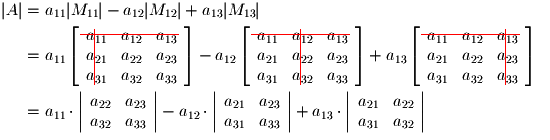


Ref: https://www.freetext.org/Introduction_to_Linear_Algebra/Basic_Matrix_Operations/Expansion_by_Minors/


Ref:https://math.libretexts.org/Bookshelves/Linear_Algebra/Linear_Algebra_with_Applications_(Nicholson)/03%3A_Determinants_and_Diagonalization/3.01%3A_The_Cofactor_Expansion



### 2.3.9 Find determinant through cofactor expansion

In [36]:
# Python program to find Determinant of a matrix using cofactor expansion method

#Ref: https://stackoverflow.com/questions/72112496/time-complexity-of-determinant-of-a-matrix-using-cofactor-method


 
# first defining a function to get the minor matrix after excluding i-th row and j-th column.

def getcofactor(m, i, j):
    return [row[: j] + row[j+1:] for row in (m[: i] + m[i+1:])]
 

    
# Now, defining the function to calculate determinant value of given matrix a.

def determinantOfMatrix(mat):
 
    # if given matrix is of order
    # 2*2 then simply return det
    # value by cross multiplying
    # elements of matrix.
    
    if(len(mat) == 2):
        value = mat[0][0] * mat[1][1] - mat[1][0] * mat[0][1]
        return value
 
    # initialize Sum to zero
    Sum = 0
 
    # loop to traverse each column
    # of matrix a.
    for current_column in range(len(mat)):
 
        # calculating the sign corresponding
        # to co-factor of that sub matrix.
        sign = (-1) ** (current_column)
 
        # calling the function recursily to
        # get determinant value of
        # sub matrix obtained.
        sub_det = determinantOfMatrix(getcofactor(mat, 0, current_column))
 
        # adding the calculated determinant
        # value of particular column
        # matrix to total Sum.
        Sum += (sign * mat[0][current_column] * sub_det)
 
    # returning the final Sum
    return Sum

 
#Let us now use the function

mat = [[1, 0, 2, -1], [3, 0, 0, 5], [2, 1, 4, -3], [1, 0, 5, 0]]

# Function call
print("Determinant of the matrix is : ", determinantOfMatrix(mat))

Determinant of the matrix is :  30


In [37]:
#Let us validate the value of determinant 

mat = [[1, 0, 2, -1], [3, 0, 0, 5], [2, 1, 4, -3], [1, 0, 5, 0]]
print("Determinant of the matrix using numpy is : ", np.round(np.linalg.det(mat),3))

Determinant of the matrix using numpy is :  30.0


### 2.3.10 Solving linear equations using matrix method (covered last week)

In [38]:
# Now, let us solve below linear equation with three variables 
# 4x + 3y + 2z = 25
# -2x + 2y + 3z = -10
# 3x -5y + 2z = -4

A = np.array([[4, 3, 2], [-2, 2, 3], [3, -5, 2]])
B = np.array([25, -10, -4])

X = np.linalg.inv(A)@B
print(X)

X = np.linalg.solve(A,B)
print(X)

[ 5.  3. -2.]
[ 5.  3. -2.]


## 2.4 Cramer's rule for solving linear equation system


For solving equation AX = B,
1. Find D = determinant of A, If D=0, unique solution can not be found.
2. Find Dx1, Dx2... where column 1,2.. of A are replaced with B
3. Find x1 = Dx1/D, x2 = Dx2/D...

Let us define a function to solve linear equation system:


### 2.4.1 Define a function using cramer's rule to solve linear equation system

In [39]:
# define function to apply cramer's rule

def cramer(A,B):
    X = np.zeros(B.shape)
    d = np.round(np.linalg.det(A),3)
    for i in range(A.shape[1]):
        Axi = A.copy()
        Axi[:,i] = B
        dxi = np.round(np.linalg.det(Axi),3)
        X[i] = dxi/d
    return X


### 2.4.2 Apply Cramer's rule to solve 2 variable linear equation system

In [40]:
#Let us solve the below equation using cramer's rule

#The equation is:
# 2x + y = 5
# x - y = 1

#express in the form of a matrix
A = np.array([[2,1],
              [1,-1]])
B = np.array([5,1])


print("\nMatrix A:\n", A)
print("\nMatrix B:\n", B)
print("\nSolution of linear equation system represented by A(LHS) and B(RHS):\n", cramer(A,B))



Matrix A:
 [[ 2  1]
 [ 1 -1]]

Matrix B:
 [5 1]

Solution of linear equation system represented by A(LHS) and B(RHS):
 [2. 1.]


### 2.4.3 Apply Cramer's rule to solve 3 variable linear equation system

In [41]:
# Now, let us solve below linear equation with three variables 
# 4x + 3y + 2z = 25
# -2x + 2y + 3z = -10
# 3x -5y + 2z = -4

A = np.array([[4, 3, 2], [-2, 2, 3], [3, -5, 2]])
B = np.array([25, -10, -4])

print("\nMatrix A:\n", A)
print("\nMatrix B:\n", B)
print("\nSolution of linear equation system represented by A(LHS) and B(RHS):\n", cramer(A,B))


Matrix A:
 [[ 4  3  2]
 [-2  2  3]
 [ 3 -5  2]]

Matrix B:
 [ 25 -10  -4]

Solution of linear equation system represented by A(LHS) and B(RHS):
 [ 5.  3. -2.]


## 2.5 Eigenvalues & Eigenvectors

### 2.5.1 What is Eigenvalues & Eigenvectors

Consider a matrix A representing a physical transformation (e.g rotation). When this matrix is used to transform a given vector x, the result is y=Ax.

Now an interesting question is

Are there any vectors x which do not change their direction under this transformation, but allow the vector magnitude to vary by scalar λ?

Such a question is of the form
Ax=λx

So, such special x are called eigenvector(s) and the change in magnitude depends on the eigenvalue λ.

Some important applications -

- Principal Components Analysis (PCA) for dimensionality reduction or producing independent components;

- Physics - stability analysis, the physics of rotating bodies;

- Market risk analysis - to define if a matrix is positive definite;


They are mainly used to reduce the dimension of large data sets by selecting only a few modes with significant eigenvalues and to find new variables that are uncorrelated; very helpful for least-square regressions of badly conditioned systems. It should be noted that the link between these statistical modes and the true dynamical modes of a system is not always straightforward because of sampling problems.


Ref:https://math.stackexchange.com/questions/23312/what-is-the-importance-of-eigenvalues-eigenvectors#:~:text=Eigenvectors%20make%20understanding%20linear%20transformations%20easy.%20They%20are,you%20the%20factors%20by%20which%20this%20compression%20occurs.

### 2.5.2 Finding Eigenvalues & Eigenvectors in python 

In [42]:
#How to calculate the Eigenvalues and Eigenvactors

# create numpy 2d-array 
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) 
  
print("Printing the Original square array:\n", A) 

# finding eigenvalues and eigenvectors 
w, v = np.linalg.eig(A) 

# printing eigen values 
print("\nPrinting the Eigenvalues of the given array:\n", np.round(w,2)) 

# printing eigen vectors 
print("\nPrinting the eigenvectors of the given array:\n", np.round(v,2)) 

Printing the Original square array:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

Printing the Eigenvalues of the given array:
 [16.12 -1.12 -0.  ]

Printing the eigenvectors of the given array:
 [[-0.23 -0.79  0.41]
 [-0.53 -0.09 -0.82]
 [-0.82  0.61  0.41]]


### 2.5.3 Validate the values found 

In [43]:
#Validating the Eigenvalues and Eigenvactors by checking equation Av = wv

print("Input Matrix@Eigen vectors:\n",np.round(A@v,2))
print("\n\nEigen values*Eigen Vectors:\n",np.round(w*v,2))

Input Matrix@Eigen vectors:
 [[ -3.74   0.88  -0.  ]
 [ -8.47   0.1   -0.  ]
 [-13.19  -0.68   0.  ]]


Eigen values*Eigen Vectors:
 [[ -3.74   0.88  -0.  ]
 [ -8.47   0.1    0.  ]
 [-13.19  -0.68  -0.  ]]


In [44]:
#One more way to validate the eigen values by equating det(A − λI) = 0.
I = np.array([[1,0,0],[0,1,0],[0,0,1]])   #Identity matrix defined
print("det(A − λI): ",np.round(np.linalg.det(A-w@I),2))

det(A − λI):  -0.0


### 2.5.4 properties of eigenvalues and eigenvectors

Below are the properties of eigenvalues and eigenvectors:

1. If 𝐴 is triangular, then the diagonal elements of 𝐴 are the eigenvalues of 𝐴.
2. If 𝜆 is an eigenvalue of 𝐴 with eigenvector 𝑥 ⃑, then 1/𝜆 is an eigenvalue of 𝐴^(−1) with eigenvector 𝑥 ⃑.
3. If 𝜆 is an eigenvalue of 𝐴, then 𝜆 is an eigenvalue of 𝐴^𝑇.
4. The sum of the eigenvalues of 𝐴 is equal to 𝑡𝑟(𝐴).
5. The product of the eigenvalues is equal to the determinant of det (𝐴).

#### 2.5.4.1 Property: 1 - If 𝐴 is triangular, then the diagonal elements of 𝐴 are the eigenvalues of 𝐴.

In [45]:
#Validate property 1: If 𝐴 is triangular, then the diagonal elements of 𝐴 are the eigenvalues of 𝐴.
A = np.array([[1,2,3], [0,5,6],[0,0,9]])
print("Printing Matrix A:\n", A) 

# finding eigenvalues and eigenvectors 
w, v = np.linalg.eig(A) 
  
# printing eigen values 
print("\nPrinting the Eigenvalues of the given array:\n", np.round(w,2)) 
  
# printing eigen vectors 
print("\nPrinting the eigenvectors of the given array:\n", np.round(v,2))

Printing Matrix A:
 [[1 2 3]
 [0 5 6]
 [0 0 9]]

Printing the Eigenvalues of the given array:
 [1. 5. 9.]

Printing the eigenvectors of the given array:
 [[1.   0.45 0.38]
 [0.   0.89 0.77]
 [0.   0.   0.51]]


#### 2.5.4.2 Property: 2 - If 𝜆 is an eigenvalue of 𝐴 with eigenvector 𝑥 ⃑, then 1/𝜆 is an eigenvalue of 𝐴^(−1) with eigenvector 𝑥 ⃑.

In [46]:
#Validate property 2: If 𝜆 is an eigenvalue of 𝐴 with eigenvector 𝑥 ⃑, then 1/𝜆 is an eigenvalue of 𝐴^(−1) with eigenvector 𝑥 ⃑.

# create numpy 2d-array 
B = np.array([[1,2,3], [0,5,6],[0,0,9]]) 

A = np.linalg.inv(B)
  
print("Printing the inverse of earlier A:\n", A)

# finding eigenvalues and eigenvectors 
w, v = np.linalg.eig(A) 

# printing eigen values 
print("\nPrinting the Eigenvalues of the given array:\n", np.round(w,2)) 

# printing eigen vectors 
print("\nPrinting the eigenvectors of the given array:\n", np.round(v,2)) 

Printing the inverse of earlier A:
 [[ 1.         -0.4        -0.06666667]
 [ 0.          0.2        -0.13333333]
 [ 0.          0.          0.11111111]]

Printing the Eigenvalues of the given array:
 [1.   0.2  0.11]

Printing the eigenvectors of the given array:
 [[1.   0.45 0.38]
 [0.   0.89 0.77]
 [0.   0.   0.51]]


#### 2.5.4.3 Property: 3 - If 𝜆 is an eigenvalue of 𝐴, then 𝜆 is also an eigenvalue of 𝐴^𝑇.

In [47]:
#Validate principle 3: If 𝜆 is an eigenvalue of 𝐴, then 𝜆 is an eigenvalue of 𝐴^𝑇.

# create numpy 2d-array 
B = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) 

A = B.T
  
print("Printing the traspose of earlier A:\n", A)

# finding eigenvalues and eigenvectors 
w, v = np.linalg.eig(A) 

# printing eigen values 
print("\nPrinting the Eigenvalues of the given array:\n", np.round(w,2)) 

# printing eigen vectors 
print("\nPrinting the eigenvectors of the given array:\n", np.round(v,2)) 

Printing the traspose of earlier A:
 [[1 4 7]
 [2 5 8]
 [3 6 9]]

Printing the Eigenvalues of the given array:
 [16.12 -1.12 -0.  ]

Printing the eigenvectors of the given array:
 [[-0.46 -0.88  0.41]
 [-0.57 -0.24 -0.82]
 [-0.68  0.4   0.41]]


#### 2.5.4.4 Property: 4 - The sum of the eigenvalues of 𝐴 is equal to 𝑡𝑟(𝐴)

In [48]:
#Validate principle 4: The sum of the eigenvalues of 𝐴 is equal to 𝑡𝑟(𝐴).

# create numpy 2d-array 
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) 
  
print("Printing matrix A:\n", A)

# finding eigenvalues and eigenvectors 
w, v = np.linalg.eig(A) 

# printing eigen values 
print("\nPrinting the Eigenvalues of the given array:\n", np.round(w,2)) 

# printing eigen vectors 
print("\nPrinting the eigenvectors of the given array:\n", np.round(v,2))

# printing sum of eigen values:
print("\nPrinting the sum of Eigenvalues of the given array:", np.round(w,2).sum())

# printing trace of A
print("\nPrinting trace of matrix A:", A.trace())

Printing matrix A:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

Printing the Eigenvalues of the given array:
 [16.12 -1.12 -0.  ]

Printing the eigenvectors of the given array:
 [[-0.23 -0.79  0.41]
 [-0.53 -0.09 -0.82]
 [-0.82  0.61  0.41]]

Printing the sum of Eigenvalues of the given array: 15.0

Printing trace of matrix A: 15


#### 2.5.4.5 Property: 5 - The product of the eigenvalues is equal to the determinant of det (𝐴).

In [49]:
#Validate principle 5: The product of the eigenvalues is equal to the determinant of det (𝐴).

A = np.array([[1,2,3], [0,5,6],[0,0,9]])
print("Printing Matrix A:\n", A) 

# finding eigenvalues and eigenvectors 
w, v = np.linalg.eig(A) 
  
# printing eigen values 
print("\nPrinting the Eigenvalues of the given array:\n", np.round(w,2)) 
  
# printing determinant 
print("\nPrinting the determinant of the given array:\n", np.round(np.linalg.det(A),2))

Printing Matrix A:
 [[1 2 3]
 [0 5 6]
 [0 0 9]]

Printing the Eigenvalues of the given array:
 [1. 5. 9.]

Printing the determinant of the given array:
 45.0


## 2.6. Summarise the learnings

Today, we learnt the below:

1. We learnt about the mathematical arithmatic operations in Matrices
2. Then we learnt about multiplication, transpose, inverse operations in Matrices 
3. We again reiterated how we can solve linear equation system using matrix operations
4. Then we learnt about the minor matrix and cofactors
5. Then we learnt how to find Adjunct of a matrix
6. Then we elarnt how we can use cofactor expansion method
7. Subsequently, we learnt how to use Cramer's rule to solve linear equation system
8. And finally we learnt about eigenvalues and eigenvectors and their properties